## Image Classification using model built in Tensorflow 

#### Using MNIST data to test the functionality of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
trX = train.drop('label',axis=1).values
trX = trX.reshape([-1,28,28])
trY = train['label'].values

In [5]:
trX.shape

(42000, 28, 28)

In [6]:
trY = pd.get_dummies(trY).values
trY.shape

(42000, 10)

#### The input images are of size (28x28) but the model expects input image size to be multiple of 8 so padding zeros at the border to make image size (32x32)

In [7]:
n_samples = trX.shape[0]
resized_image = []
for i in xrange(n_samples):
    img = trX[i]
    img = np.lib.pad(img, (2,2), 'constant', constant_values=(0))
    resized_image.append(img)

In [8]:
trX = np.array(resized_image).reshape([-1,32,32,1])

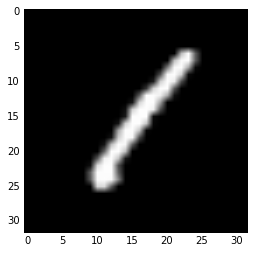

In [9]:
plt.imshow(trX[0].reshape(32,32),cmap='gray')

In [10]:
trX = trX/255.0

In [11]:
from sklearn.cross_validation import train_test_split
Xtrain,Xval,ytrain,yval = train_test_split(trX,trY,test_size=0.2)

In [12]:
from ImageClassifier import ConvolutionalClassifier
clf = ConvolutionalClassifier(n_classes=10,img_dims=trX[0].shape)

In [13]:
clf.train(Xtrain,ytrain,n_iters=8000,batch_size=20,learning_rate=7e-4,keep_prob=0.5)

Loss at step 0: 2.28727
Loss at step 10: 2.35246
Loss at step 20: 2.3098
Loss at step 30: 2.26058
Loss at step 40: 2.29574
Loss at step 50: 2.30639
Loss at step 60: 2.30955
Loss at step 70: 2.29447
Loss at step 80: 2.28883
Loss at step 90: 2.30933
Loss at step 100: 2.28252
Loss at step 110: 2.27603
Loss at step 120: 2.30688
Loss at step 130: 2.27051
Loss at step 140: 2.31147
Loss at step 150: 2.26909
Loss at step 160: 2.26839
Loss at step 170: 2.21736
Loss at step 180: 2.24162
Loss at step 190: 2.25165
Loss at step 200: 2.16506
Loss at step 210: 2.19543
Loss at step 220: 2.09392
Loss at step 230: 2.08596
Loss at step 240: 1.81258
Loss at step 250: 1.76016
Loss at step 260: 1.91984
Loss at step 270: 1.63146
Loss at step 280: 1.38414
Loss at step 290: 1.36652
Loss at step 300: 1.11573
Loss at step 310: 1.75332
Loss at step 320: 1.29603
Loss at step 330: 1.09903
Loss at step 340: 0.929128
Loss at step 350: 1.2202
Loss at step 360: 0.896245
Loss at step 370: 0.817039
Loss at step 380: 1.05

In [14]:
# Accuracy and loss for training data
clf.score(Xtrain,ytrain)

[0.97988093, 0.071598686]

In [15]:
# Accuracy and loss for validation data
clf.score(Xval,yval)

[0.97690475, 0.079388298]

### Loss function and accuracy plots visualized using tensorboard with logdir=convClf_logs/